# Projeto 01: Fuga da Prisão

Vamos trabalhar com um conjunto de dados de fugas de prisões de helicóptero!

Começamos importando algumas funções auxiliares.

In [ ]:
from helper import *

## Parte 01: Obtendo os dados


Agora, vamos obter os dados da Lista de fugas de helicópteros da Wikipédia. [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) 

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

Vamos imprimir as três primeiras linhas.

In [ ]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

## Parte 02: Tratar os dados

### Removendo os detalhes

Inicializamos uma variável `index` com o valor de `0`. O objetivo dessa variável é nos ajudar a rastrear qual linha estamos modificando.

In [ ]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [ ]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


### Extraindo o ano

Na célula de código abaixo, iteramos sobre `data` usando a variável iterável `row` e:

-  Com cada ocorrência de `row[0]`, nos referimos à primeira entrada de `row`, ou seja, a data (date).
-  Assim, com `date = fetch_year(row[0])`, estamos extraindo o ano da data em `row[0]` e atribuindo-o à variável `date`.
- Em seguida, substituímos o valor de `row[0]` pelo ano que acabamos de extrair.

In [ ]:
for row in data:
    date = fetch_year(row[0])
    row[0] = date

In [ ]:
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


### Tentativas por ano

In [ ]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

Antes de prosseguirmos, vamos verificar quais são as datas mais antigas e mais recentes que temos em nosso conjunto de dados.

In [ ]:
print(min_year)
print(max_year)

1971
2020


Agora vamos criar uma lista de todos os anos variando de `min_year` a `max_year`. Nosso objetivo é então determinar quantas tentativas de fuga da prisão ocorreram em cada ano. Como os anos em que não houve fugas de prisão não estão presentes no conjunto de dados, isso garantirá que os capturemos.

In [ ]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)

Vamos dar uma olhada em `years` para ver se parece com o que esperávamos.

In [ ]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Ótimo!

Agora criamos uma lista onde cada elemento será`[<year>, 0]`.

In [ ]:
attempts_per_year = []
for y in years:
    attempts_per_year.append([y, 0])

E finalmente incrementamos a segunda entrada (a do índice `1` que começa como sendo `0`) em `1` cada vez que um ano aparece nos dados.

In [ ]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1
            
print(attempts_per_year)    

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


## Gráfico 

Para visualizar os resultados, vamos plotar um gráfico do tipo barra.

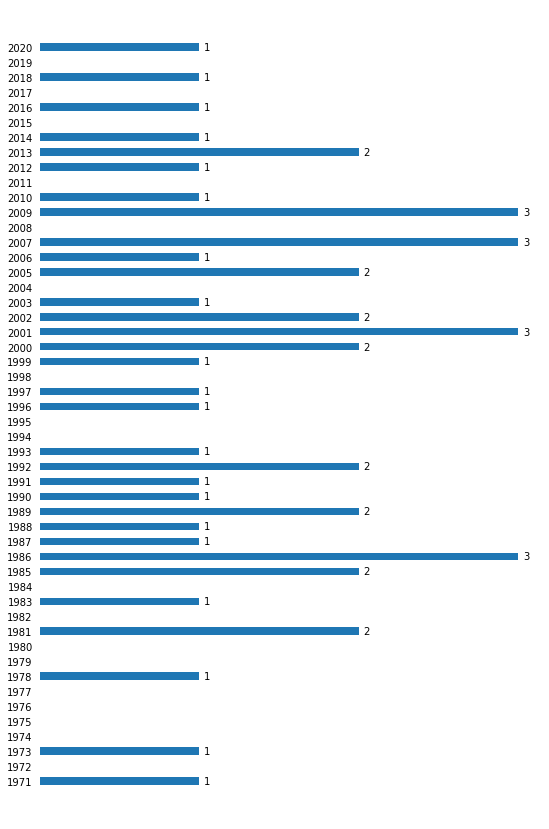

In [ ]:
%matplotlib inline
barplot(attempts_per_year)

De acordo com o gráfico, podemos visualizar que os anos em que ocorreram mais tentativas de fuga de helicóptero foram 1986, 2001, 2007 e 2009, com um total de três tentativas cada.

# Tentativas por país

In [ ]:
countries_frequency = df.groupby("Country")
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


De longe, o país com mais tentativas de fuga de prisão por helicóptero é a França.